In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

sns.set_style('white')

In [53]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


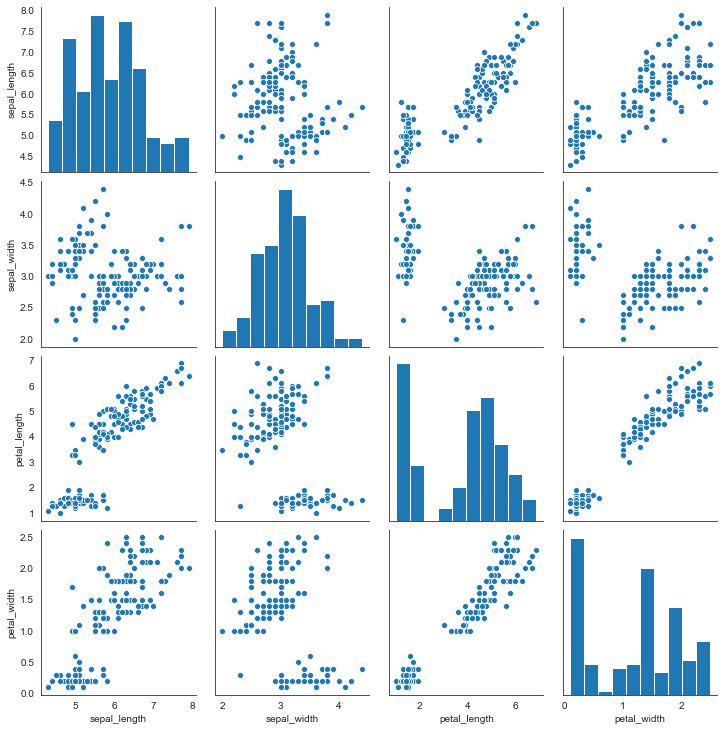

In [54]:
sns.pairplot(iris)

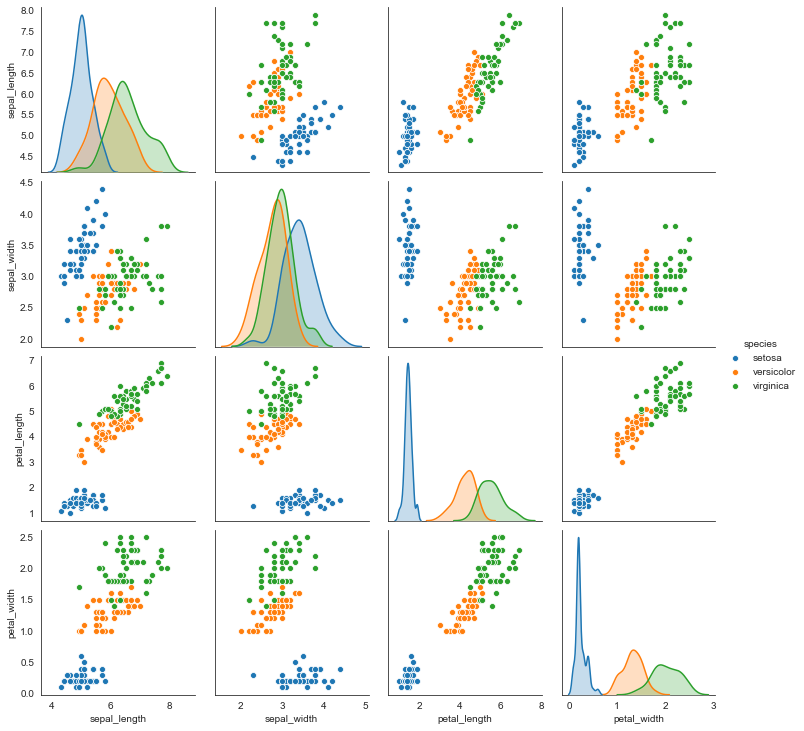

In [55]:
sns.pairplot(iris, hue='species')

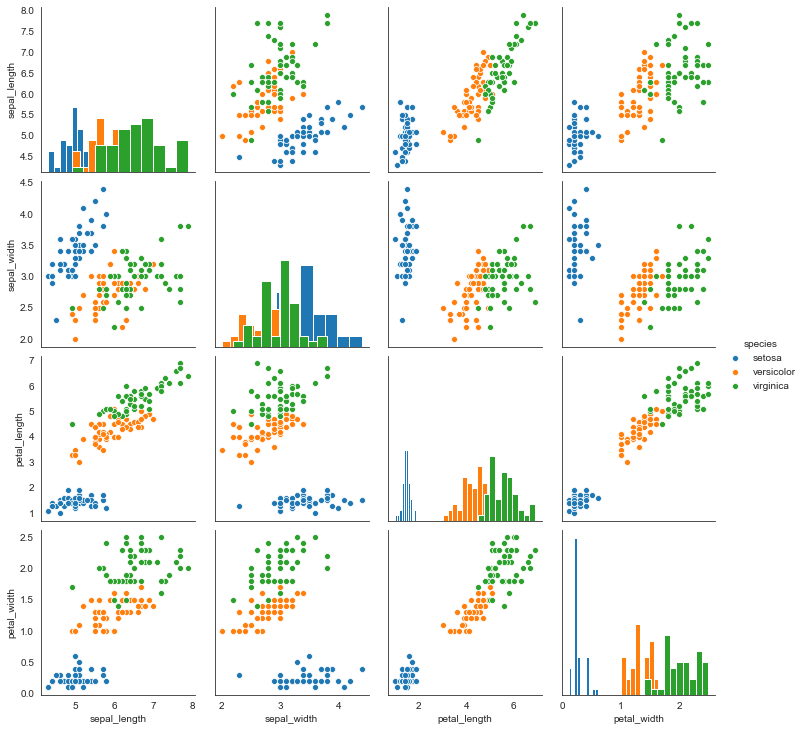

In [56]:
sns.pairplot(iris, hue="species", diag_kind="hist")

In [57]:
!pip install altair
!pip install vega==1.3
!pip install altair
!pip install vega==1.3

In [58]:
import altair as alt
from vega_datasets import data

source = data.iris()

alt.Chart(iris).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species'
).properties(
    width=150,
    height=150
).repeat(
    row=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
).interactive()

alt.RepeatChart(...)

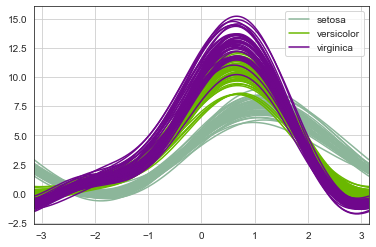

In [60]:
from pandas.plotting import andrews_curves
source = data.iris()
plt.figure()
andrews_curves(source, 'species')

In [61]:
iris_transformed = iris.reset_index().melt(['species', 'index'])
alt.Chart(iris_transformed).mark_line().encode(
    x='variable:N',
    y='value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5),
).properties(width=500)

alt.Chart(...)

In [64]:
iris_transformed.head(3)

,species,index,variable,value
0,setosa,0,sepal_length,5.1
1,setosa,1,sepal_length,4.9
2,setosa,2,sepal_length,4.7


# Task 4
The data iris_transformed is being reset to default and columns index and value have to be added to the transformed dataset. The main difference between the transformed iris dataset and the original dataset is that we need transform the original dataset to turn column names into column values. We have to trasnform it this way to see the aggregate of the types of species and when we are not interested in seeing multiple pairwise bivariate distributions in the dataset anymore.

In [10]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [11]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_only_features = iris[features]
iris_only_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
pca_iris_fitted = pca.fit(iris_only_features)

In [14]:
pca_iris_fitted.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [15]:
iris_pca = pca_iris_fitted.transform(iris_only_features)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [16]:
iris_pca = pca.fit_transform(iris_only_features)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [17]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [18]:
!pip install pandas

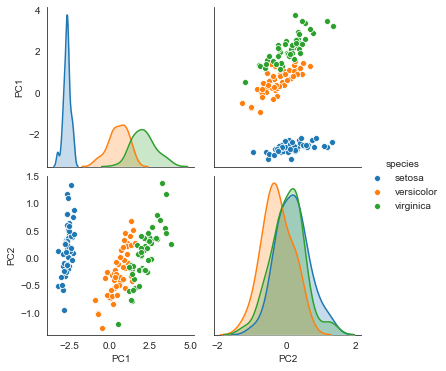

In [19]:
df = pd.DataFrame(iris_pca_df)
df1 = df.assign(species = iris['species'])
df1
sns.pairplot(df1, hue ='species')

In [20]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data

In [21]:
n_samples, n_features = faces.shape
print(n_samples)
print(n_features)

400
4096


In [22]:
print(faces[0].shape)
faces[0]

(4096,)


array([0.6694215 , 0.6363636 , 0.6487603 , ..., 0.08677686, 0.08264463,
       0.07438017], dtype=float32)

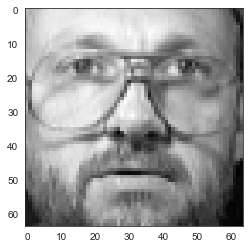

In [23]:
image = faces[0].reshape(64,64)
plt.imshow(image, cmap ='gray')
plt.show()

In [24]:
from sklearn.decomposition import PCA

In [25]:
n_components=6
pca = PCA(n_components=n_components)

In [26]:
pca.fit(faces)

PCA(n_components=6)

In [27]:
pca.components_

array([[-0.0041911 , -0.00710949, -0.00933607, ...,  0.00018513,
         0.00337963,  0.00318824],
       [-0.02859139, -0.03328843, -0.03784649, ...,  0.02962782,
         0.02721298,  0.02488899],
       [ 0.00135671, -0.00032582, -0.00019799, ..., -0.01541363,
        -0.01370977, -0.0118834 ],
       [ 0.00112399, -0.00179029, -0.01168225, ...,  0.02943002,
         0.02781921,  0.02521855],
       [-0.02384279, -0.02359105, -0.02216122, ..., -0.04243901,
        -0.04007402, -0.04110268],
       [ 0.02910205,  0.03130565,  0.02877717, ..., -0.01635807,
        -0.01637335, -0.01490832]], dtype=float32)

In [28]:
pca.components_.shape

(6, 4096)

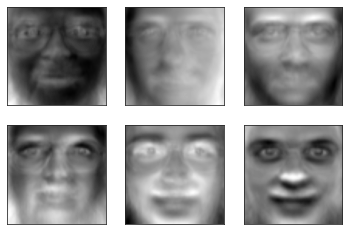

In [29]:
image_shape = (64, 64)

for i, comp in enumerate(pca.components_, 1):
    plt.subplot(2, 3, i)
    plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
    plt.xticks(())
    plt.yticks(())

In [30]:
faces_pca_transformed = pca.transform(faces)

In [31]:
faces_pca_transformed.shape

(400, 6)

In [32]:
faces_pca_transformed[0]

array([ 0.8157984 , -4.144033  ,  2.4832644 , -0.90308416,  0.8313265 ,
        0.88618356], dtype=float32)

([], <a list of 0 Text major ticklabel objects>)

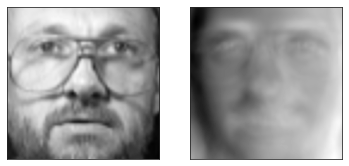

In [33]:
plt.subplot(1, 2, 1)
plt.imshow(faces[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.imshow(pca.components_[1].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
plt.xticks(())
plt.yticks(())

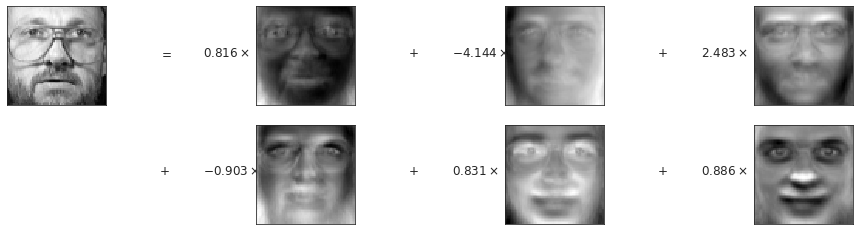

In [34]:
from matplotlib import gridspec

def display_image(ax, image):
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_xticks(())
    ax.set_yticks(())

def display_text(ax, text):
    ax.text(.5, .5, text, size=12)
    ax.axis('off')

face_idx = 0

plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(2, 10, width_ratios=[5,1,1,5,1,1,5,1,1,5])

# display the face
ax = plt.subplot(gs[0])
display_image(ax, faces[face_idx].reshape(image_shape))

# display the equal sign
ax = plt.subplot(gs[1])
display_text(ax, r'$=$')

# display the 6 coordinates
for coord_i, gs_i in enumerate( [2,5,8,12,15,18] ):
    ax = plt.subplot(gs[gs_i])
    display_text( ax, r'$%.3f \times $' % faces_pca_transformed[face_idx][coord_i] )

# display the 6 components
for comp_i, gs_i in enumerate( [3,6,9,13,16,19] ):
    ax = plt.subplot(gs[gs_i])
    display_image( ax, pca.components_[comp_i].reshape(image_shape) )

# display the plus sign
for gs_i in [4,7,11,14,17]:
    ax = plt.subplot(gs[gs_i])
    display_text(ax, r'$+$')

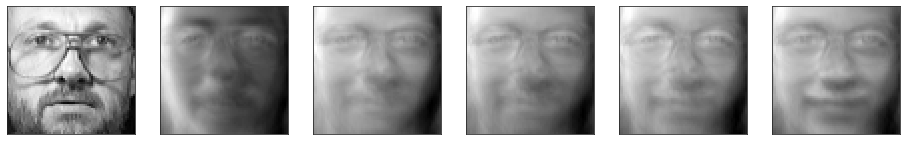

In [35]:
f, axes = plt.subplots(1, 6, figsize=(16,4))

faceid = 0

constructed_faces = []
for i in range(2, 10):
    constructed_faces.append(np.dot(faces_pca_transformed[faceid][:i], pca.components_[:i]))

# the face that we want to construct. 
display_image(axes[0], faces[0].reshape(image_shape))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(image_shape))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


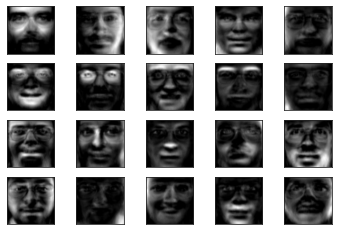

In [36]:
from sklearn.decomposition import NMF
n_components=20
nmf = NMF(n_components=n_components)
nmf_fitted = nmf.fit(faces)

for i, comp in enumerate(nmf_fitted.components_, 1):
    plt.subplot(4, 5, i)
    plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
    plt.xticks(())
    plt.yticks(())

In [40]:
faces_nmf_transformed = nmf_fitted.transform(faces)

In [41]:
faces_nmf_transformed[0]

array([0.5343599 , 0.        , 0.3284093 , 0.        , 0.33648664,
       0.48565814, 0.60531276, 0.55029345, 0.331673  , 0.15908925,
       0.        , 0.10867868, 0.09772097, 0.        , 0.6114567 ,
       0.2320224 , 0.        , 0.3180162 , 0.21694286, 0.        ],
      dtype=float32)

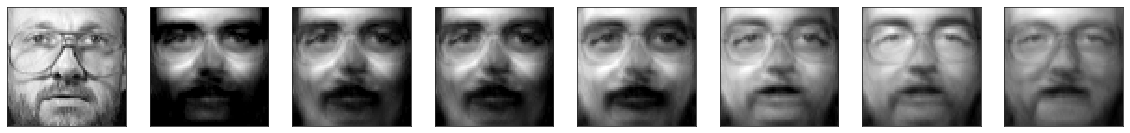

In [42]:
f, axes = plt.subplots(1, 8, figsize=(20,4))
faceid = 0
constructed_faces = []
for i in range(2, 10):
    constructed_faces.append(np.dot(faces_nmf_transformed[faceid][:i], nmf_fitted.components_[:i]))

# the face that we want to construct. 
display_image(axes[0], faces[0].reshape(image_shape))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(image_shape))

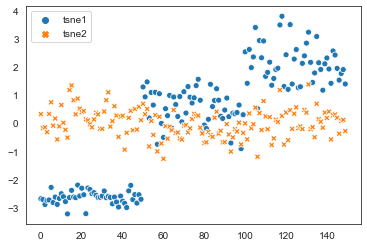

In [96]:
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.datasets import load_iris

iris = load_iris()
n_components=3
tsne = TSNE(n_components=n_components)
tsne_iris_fitted = tsne.fit(iris_only_features)
iris_tsne_df = pd.DataFrame(data=iris_pca, columns=['tsne1', 'tsne2'])
iris_tsne_df.head()

sns.scatterplot(data=iris_tsne_df)
perplexity = 50

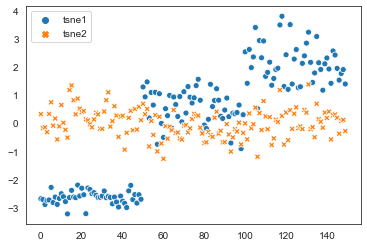

In [116]:
n_components=1
sns.scatterplot(data=iris_tsne_df)
perplexity = 35

In [98]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [99]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [100]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


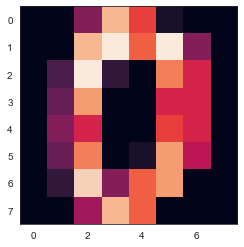

In [101]:
img = digits.data[0]
print(img)
plt.imshow(img.reshape(8,8))

In [102]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])


In [103]:
tsne = TSNE(n_components=2, init='pca', random_state=0)

In [104]:
digits_proj = tsne.fit_transform(X)

In [105]:
palette = np.array(sns.color_palette("hls", 10))

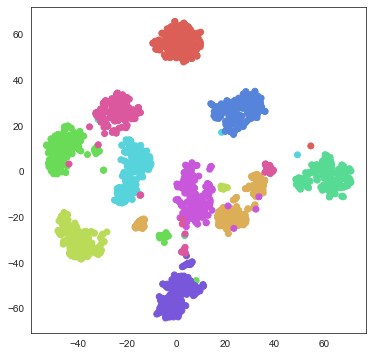

In [106]:
plt.figure(figsize = (6,6))
plt.scatter(digits_proj[:,0], digits_proj[:,1],c=palette[y])

In [107]:
def plot_scatter(projection):
    plt.figure(figsize = (6,6))
    plt.scatter(projection[:,0], projection[:,1],c=palette[y])
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(projection[y == i, :], axis=0)
        txt = plt.text(xtext, ytext, str(i), fontsize=24)

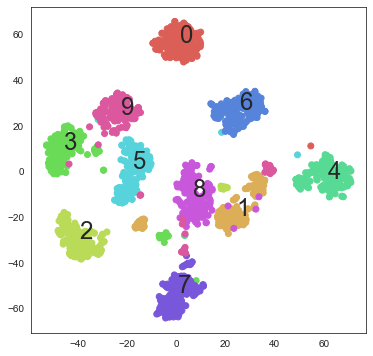

In [108]:
plot_scatter(digits_proj)

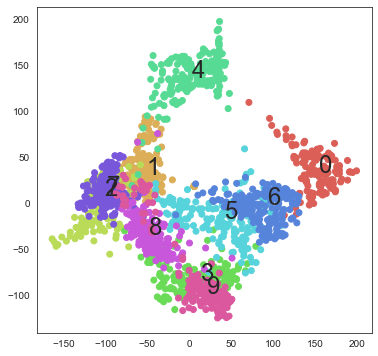

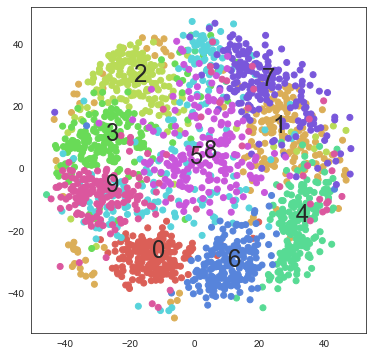

In [114]:
digits_pro=Isomap(n_neighbors=5,n_components=2).fit_transform(X)
plot_scatter(digits_pro)
digits_pro=MDS(n_components=2).fit_transform(X)
plot_scatter(digits_pro)

# Task 11
The challenges that I faced are many. I am still struggling to see what important and relevant information can we derive from the ouput such as the last Isomap and MDS, and in what real life cases is this applicable to. Other than describing what I see on the surface, that is saying I see blob of colors and plots overlapping on one and another and similar colors being placed adjacent to each other on the plot (as explained by professor YY), it is hard to conclude what relations do these digits to one another. My guess is we can only make questions while observing the outputs, which could be just as valuable as making solid conclusions. The pairplot is the most useful in understanding correlations and realtionships between the three categories. From all the visualization methods used such as pairplots, scatterplots, histograms, parallel coordinate plots, it is safe to say that virginica and versicolor have the strongest relationship. With the PCA face dataset, it was entertaining to see how the process of reconstructing the images of faces and incrementing wrights can lead to a more accurate depiction of the faces. Reconstructing the NMF was surprisingly easier and less complicated than I thought for task 7. Making an interactive scatterplot matrix was fun, but I don't like how it can distort the graph, so I would leave the interactive element for other types of graphs such as the last MDS map. For this one, I can play with it and see the relationship between the digits.